In [12]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
df = pd.read_excel("weighted average output.xlsx")
y = list(df['true '])
y_pred = list(df['predicted'])
print(y)
print(y_pred)
# df

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]
[0.0, 1.0, 0.72, 0.13, 0.37, 0.678, 0.66, 0.75, 0.37, 0.28, 0.82, 0.82, 0.16, 0.79, 0.02, 0.02, 0.02]


In [36]:
y = np.array(y)
y_pred = np.array(y_pred)

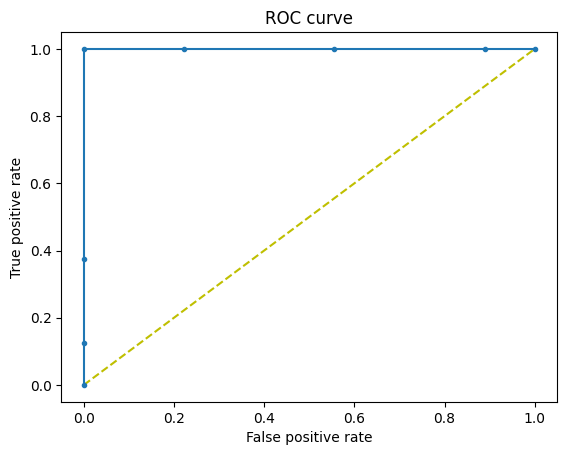

In [26]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [27]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  3    0.66
Name: thresholds, dtype: float64


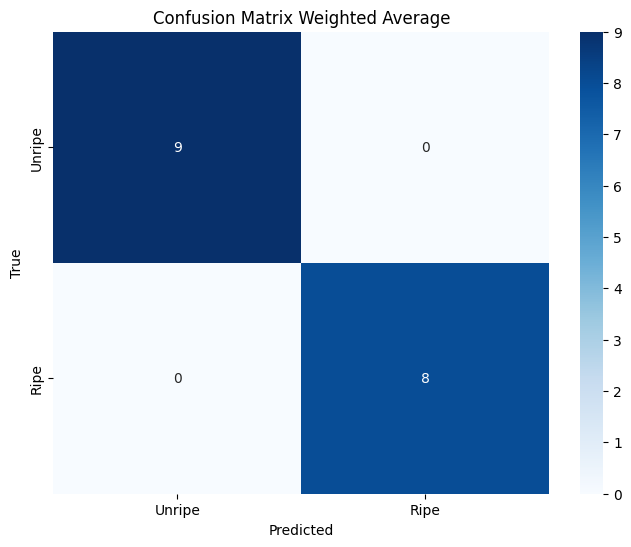

In [46]:
y_pred_classes = (y_pred >= 0.66).astype(int)  # Assuming it's a binary classification problem

# Generate the confusion matrix
conf_mat = confusion_matrix(y, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.title('Confusion Matrix Weighted Average')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
acc = accuracy_score(y, y_pred_classes)
print(f"Weighted Average accuracy : {acc*100}%")

Weighted Average accuracy : 100.0%


In [30]:
df

,true,predicted
0,0,0.000
1,1,1.000
2,1,0.720
3,0,0.130
4,0,0.370
5,1,0.678
6,1,0.660
7,1,0.750
8,0,0.370
9,0,0.280
